In [17]:
from data_helper import get_train_dataset, get_test_dataset, visualize

In [18]:
type = "bare"

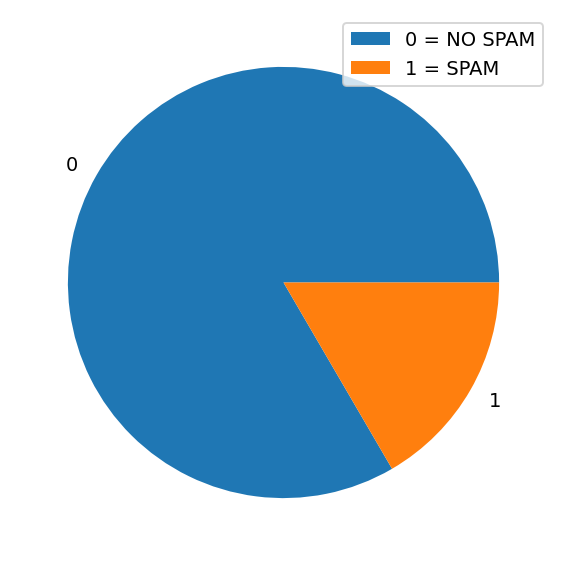

0 0


In [19]:
df = get_train_dataset(type)
visualize(df)

In [20]:
print(f"NOT SPAM: {df['is_spam'].value_counts()[0]}")
print(f"SPAM: {df['is_spam'].value_counts()[1]}")
print(f"NOT SPAM PERCENTAGE: {df['is_spam'].value_counts()[0] / len(df) * 100}%")
print(f"SPAM PERCENTAGE: {df['is_spam'].value_counts()[1] / len(df) * 100}%")

NOT SPAM: 2170
SPAM: 432
NOT SPAM PERCENTAGE: 83.39738662567257%
SPAM PERCENTAGE: 16.60261337432744%


In [21]:
df.head()

,is_spam,cleaned
0,0,conference announcement first announcement gro...
1,1,life without debt pardon intrusion offence mea...
2,1,want best economical hunting vacation life wan...
3,0,query uninflected tags anybody know recent wor...
4,0,accent allowed anybody else seen weird piece n...


ADA BOOST CLASSIFIER

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import warnings
from sklearn.pipeline import Pipeline

In [23]:
X = df.cleaned
Y = df.is_spam

# not ok. actually you should use our method... stupid I know
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

ADA BOOST

In [24]:
abc = AdaBoostClassifier()
model_1 = Pipeline([('vectorizer',tvec),('classifier',abc)])
model_1.fit(X_train,Y_train)


y_pred = model_1.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[215   2]
 [  3  41]]
Accuracy :  0.9808429118773946
Precision :  0.9807174323370994
Recall :  0.9808429118773946


NAIVE BAIES

In [25]:
mnb = MultinomialNB()
model_2 = Pipeline([('vectorizer',tvec),('classifier',mnb)])
model_2.fit(X_train,Y_train)


y_pred = model_2.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[218  30]
 [  0  13]]
Accuracy :  0.8850574712643678
Precision :  0.9652499331729484
Recall :  0.8850574712643678


KNN

In [26]:
knn = KNeighborsClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',knn)])
model_3.fit(X_train,Y_train)

y_pred = model_3.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[214   5]
 [  4  38]]
Accuracy :  0.9655172413793104
Precision :  0.9658924538157634
Recall :  0.9655172413793104


CLUSTERING

In [27]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1, verbose=True)
model_4 = Pipeline([('vectorizer',tvec),('classifier',km)])
model_4.fit(X_train,Y_train)

y_pred = model_4.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Initialization complete
Iteration 0, inertia 4145.219553443439.
Iteration 1, inertia 2203.98116999612.
Iteration 2, inertia 2182.036367654857.
Iteration 3, inertia 2169.249128065219.
Iteration 4, inertia 2166.486150798206.
Iteration 5, inertia 2165.6257624883574.
Iteration 6, inertia 2165.221209079781.
Iteration 7, inertia 2165.025580120152.
Iteration 8, inertia 2164.960060675322.
Iteration 9, inertia 2164.9188650787546.
Iteration 10, inertia 2164.8947834436512.
Iteration 11, inertia 2164.89301731486.
Iteration 12, inertia 2164.891276898463.
Converged at iteration 12: strict convergence.
[[ 84  23]
 [134  20]]
Accuracy :  0.39846743295019155
Precision :  0.4324033133138288
Recall :  0.39846743295019155


ID3

In [28]:
dtc = DecisionTreeClassifier(criterion="entropy")
model_5 = Pipeline([('vectorizer',tvec),('classifier',dtc)])
model_5.fit(X_train,Y_train)

y_pred = model_5.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[214   3]
 [  4  40]]
Accuracy :  0.9731800766283525
Precision :  0.9729830696628073
Recall :  0.9731800766283525
